# 4.5 Zero-order hold

## 4.5.1 Creating a continuous time signal from discrete time samples

In the previous section, we created a discrete time model of a continuous time system, $H(s)$,  
which resulted in the discrete time transfer function, $H(z)$  
  
The model was found by using an approximation to the relationship between the   
continuous time frequency, $s$, and the discrete time frequency, $z$  
  
$$z=e^{sT}\approx1+sT\approx\frac{1}{1-sT}\approx\frac{1+\frac{sT}{2}}{1-\frac{sT}{2}}$$  
In this section, we are going to look at creating a model of a continuous time system,  
by actually sampling the continuous time wave and then recreating it from the numbers  
  
We learned earlier that a piece of hardware called the digital to analog converter (DAC)  
can create a continuous time wave from a set of discrete time samples  
  
A DAC could use many theoretical ways to construct a wave from the set of sampled points  
One is called zero-order hold and another is called first-order hold  
The figure belows shows how the two methods will construct the continuous time wave  
  
All modern DACs use the zero-order hold technique  
You should realize that the DAC is taking liberty to fill in information between samples, however it wants to  
It is not recreating the exact continuous time wave from the Wikipedia figure shown below  
That information is lost when the continuous wave is sampled  
  
Therefore, the DAC will have an impact on the frequency domain information of the recreated wave  
![image1!](./images_s4/image_4_5_1.png)  

## 4.5.2 The transfer function of a sampled system with zero-order hold

The sampling system below takes a continuous time signal at its input and produces a continuous time signal at its output,  
so it has a transfer function $H(s)=\frac{Y(s)}{X(s)}$  
However, in between, the signal is converted to a set of numbers, so there is a discrete time component to the system  
The figure also shows where the effect of zero-order hold is introduced to the signal  
![image2!](./images_s4/image_4_5_2.png)  
The analog to digital converter, simply samples the signal, $x(t)$, it has no impact on the frequency response  
In fact, the frequency domain signal, $X(z)$ is often called the starred input, $X(z)=\left.X^*(s)\right|_{s=\frac{ln(z)}{T}}$  
which is just the Laplace transform of the sampled input signal, when $s=\frac{ln(z)}{T}$  
  
The transfer function of the sampled system, depicted above, is  
[zoh transfer function](https://en.wikipedia.org/wiki/Zero-order_hold)  
  
$$H(s)\equiv\frac{Y(s)}{X(s)}=\frac{(1-e^{-sT})}{sT}$$  
  
We are interested in what effect sampling and reconstruction has on the original signal  
The zero-order hold transfer function is plotted as a function of input frequency in the code cell below  
  
Up until 500Hz, the output signal comes out at the same frequency as the input,  
however, beyond 500Hz, the signals are aliased to lower frequencies  
The figure produced by the code cell below really should be folded,  
with input frequencies from 500Hz to 1000Hz folded back from 500Hz down to 0Hz, and so on...  

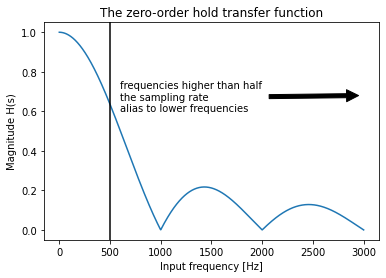

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = np.linspace(1, 3000, 1000)
w = 2*np.pi*f
s = 1j*w
T = 0.001
H_s = (1-np.exp(-s*T))/(s*T)
mag = np.abs(H_s)
phase = np.angle(H_s, deg=True)

plt.plot(f, mag)
plt.axvline(x=500, color='k')
plt.annotate('frequencies higher than half\nthe sampling rate\nalias to lower frequencies', 
             xy=(3000,0.68), xytext=(600, 0.6), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Input frequency [Hz]')
plt.ylabel('Magnitude H(s)')
plt.title('The zero-order hold transfer function')
plt.show()

## 4.5.3 Reconstructed waves

You can see in the figure of the transfer function above,  
that the effect of zero-order hold is to slightly diminish the magnitude of the signal  
The worst case is at half the sampling rate, (considering only signals at or below half the sampling rate)  
It turns out that the magnitude of the transfer function at half the sampling rate is  
0.637, which equals the average of one positive "hump" of a sine wave  
  
Of course, like every transfer function, the value $H(s)$ is a complex number  
The complex number refers to a magnitude and phase  
The figure above is only plotting the magnitude portion of the transfer function  
  
The sections below show how signals are reconstructed at variuos frequencies,  
when passing through the sampling and reconstruction system above  

### 4.5.3.1 Reconstructing a wave well below half the sampling rate

Consider a 100Hz wave sampled at 1000 samples/second  
The code cell below plots the the input and output waves; x(t) and y(t)  
The zero-order hold, transfer function, is describing the relation between these two waves  

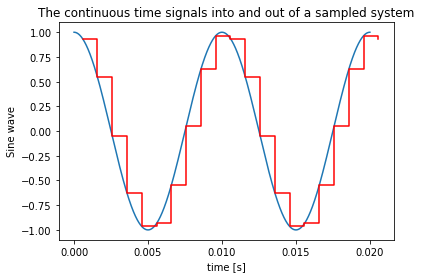

In [2]:
t = np.linspace(0, 0.02, 5000)
f_t = 0.5*np.exp(2*np.pi*100j*t) + 0.5*np.exp(-2*np.pi*100j*t)
sample_times =  np.arange(0.000577, 0.021, 0.001) # 1000 samples per second
samples = 0.5*np.exp(2*np.pi*100j*sample_times) + 0.5*np.exp(-2*np.pi*100j*sample_times)

plt.plot(t, f_t.real)
plt.step(sample_times, samples.real, where='post', color='r')
plt.xlabel('time [s]')
plt.ylabel('Sine wave')
plt.title('The continuous time signals into and out of a sampled system')
plt.show()

The blue wave above is entering the sampling system and the red wave is the output  
The frequency is $s=j2\pi100$ and T=0.001[s], which gives us $H(s)=\frac{(1-e^{-sT})}{sT}=0.935-0.304j$,  
In polar form, H(s) has a magnitude of 0.935 and an angle of $-18^\circ$  
  
The "boxiness" caused by the zero-order hold reduces the magnitude slightly from 1  
The reduction in magnitude has to do with how the samples align themselves with the input sine wave  
Although the alignment between the sampler and the input sine wave will drift,  
the example above shows the average alignment, causing the slight loss in signal to 0.935 instead of 1  
  
The phase shift of $-18^\circ$ (shift right) can clearly be seen between the blue and red waves  

### 4.5.3.2 Reconstructing a wave equal to half the sampling rate

The figure below shows three cases of a 500Hz wave being sampled at 1000 samples/sec,  
the input is exactly half the sampling rate   
  
The difference in the three cases, is how the samples and input wave align in time  
If you pass a wave at half the sampling rate through a sampler/reconstruction system in the lab,  
the result is a very strange waveform  
You will see the output transitioning or "pulsing" between the different alignments  
In practice, the sampler and input can never stay at exactly the same frequency or phase,  
so they drift with respect to each other, causing the "pulses"  
"pulses" is a good description because the wave dissappears when the alignment is like the figure on the left  
and becomes very large when the alignment is like the figure on the right  
  
Only the samples, not the output "boxes", are shown in the figures on the left and the right  
because the "boxes" make the figures hard to interpret,  
but, in each case, the blue wave is 500Hz and the samples are 0.001 seconds apart  
Only the alignment is changed  
  
In the case on the left, the sampler aligns with the input such that no signal comes out  
  
In the case on the right, the sampler aligns to produce a square wave equal in magnitude to the cos wave  
  
The figure in the middle shows the the average alignment  

Evaluating the zero order hold transfer function with $s=j2\pi500$ and T=0.001[s],  
gives us $H(s)=\frac{(1-e^{-sT})}{sT}=0.0-0.637j$,  
In polar form, H(s) has a magnitude of 0.637 and an angle of $-90^\circ$  
  
You should be able to see from the middle figure, a magnitude of 0.637 and a phase shift of $-90^\circ$ (to the right)  
![image3!](./images_s4/image_4_5_3.png)  
  
Even though this crazy behavior happens when the input is exactly half the sampling rate,  
the discrete time system works fine, as long as you wait long enough to observe the average  
Typically, engineers will design systems such that important signals are well below half the sampling rate  

### 4.5.3.3 Reconstructing a wave equal to the sampling rate

If you go back and look at the transfer function of the zero-order hold,   
you will see it goes to zero at the frequency equal to the sampling rate  
It also goes to zero at all integer multiples of the sampling rate  
  
It is easy to see in the figure below, why the output is zero at the sampling rate  
Carefully compare figure below with the previous figure  
The input wave is twice as fast in the figure below, it's at the sampling rate, not half the sampling rate  
Only one sample per cos wave period is observed, and the output will be zero  
no matter how the sampler and input wave are aligned  
![image4!](./images_s4/image_4_5_4.png)  

## 4.5.4 Zero-order hold as a model for continuous time transfer functions

When we model continuous time transfer functions, we try to find a discrete time transfer function,  
that has the same properties as the continuous time transfer function  
  
The sampling system shown below is like the previous system turned inside out  
Overall, there is a discrete time transfer function, but in between, the signal is continuous  
In the diagram, a continuous time system $H(s)$ is present, but you could set $H(s)=1$ to ignore its effect  
![image5!](./images_s4/image_4_5_5.png)  
With considerable math that we won't show,  
we can write the transfer function of the sampling system above as  
  
$$H(z)\equiv\frac{Y(z)}{X(z)}=(1-z^{-1})\mathcal{Z}\left(\mathcal{L}^{-1}\left\{\frac{H(s)}{s}\right\}\right)$$  
Using this equation, we can convert a continuous time transfer function $H(s)$, to a discrete time model $H(z)$  
This is similar to the previous chapter, and just another way to find $H(z)$ from $H(s)$  

## 4.5.5 Converting an example system using the zero-order hold

Consider the example transfer function we used previously to test  
the Forward Euler, Backward Euler, and Bilinear methods  
The system we want to model is  
  
$$H(s)=\frac{10}{s+10}$$  
put this in the transfer function  of the zero-order hold sampled system  
  
$$H(z)\equiv\frac{y(z)}{x(z)}=(1-z^{-1})\mathcal{Z}\left(\mathcal{L}^{-1}\left\{\frac{10}{s(s+10)}\right\}\right)$$  
Take the inverse Laplace transform  
  
$$H(z)=(1-z^{-1})\mathcal{Z}\left(1-e^{-10t}\right)$$  
You have to account for sampling the system with the ADC, so $t=kT$  
we used a sampling rate of 20 samples/sec, or $T=0.05$[s]  
in this case, $e^{-10kT}=e^{-0.5k}=0.61^k$
  
$$H(z)=(1-z^{-1})\mathcal{Z}\left(u(kT)-e^{-10kT}\right)=(1-z^{-1})\mathcal{Z}\left(u[k]-0.61^{k}\right)$$  
We can look the terms up in the z-transform table to find the z-transform  
  
$$H(z)=(1-z^{-1})\left(\frac{z}{z-1}-\frac{z}{z-0.61}\right)$$  
finding the common denominator and multiplying everything out, yields  
  
$$H(z)=\frac{0.39}{z-0.61}$$  
The code cell below uses the [to_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cont2discrete.html#scipy.signal.cont2discrete) method to find the zero-order hold model  

In [3]:
import scipy.signal as sig

# enter the continuous time transfer function and create a continuous time lti system
num = [10]
den = [1, 10]
H_s = sig.lti(num, den)

# you must specify a sample period
dt = 0.05

# sometimes you will get a badly conditioned coefficients warning from Scipy
# its just a warning not an error
H_z_zoh = H_s.to_discrete(dt=dt, method='zoh')
print(H_z_zoh)

TransferFunctionDiscrete(
array([0.39346934]),
array([ 1.        , -0.60653066]),
dt: 0.05
)


c:\Users\j4000774\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


## 4.5.6 Comparing forward Euler, backward Euler, bilinear, and zero-order hold models

In the following code cells, the forward Euler, backward Euler, bilinear, and zero-order hold models  
will be compared, by showing the results of the step, impulse, and Bode plot methods  
  
We have used all of these standard Scipy methods with continuous time systems throughout this course  
The discrete time methods are very similar and work equally well for discrete time systems  

### 4.5.6.1 Discrete time step response

The step response is quite straight forward  
The code cell below creates a dlti system for each of the different approximations  
and then plots the step responses  
comparing them with the step response of the continuous time system  
[Discrete step response](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dstep.html#scipy.signal.dstep)

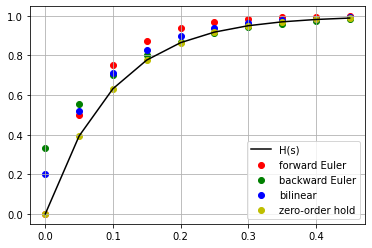

In [4]:
# create the discrete time transfer functions for comparison
H_z_fe = H_s.to_discrete(dt=dt, method='euler')
H_z_be = H_s.to_discrete(dt=dt, method='backward_diff')
H_z_b = H_s.to_discrete(dt=dt, method='bilinear')
H_z_zoh = H_s.to_discrete(dt=dt, method='zoh')

# create a time array
t = np.arange(0, 0.5, 0.05)

# find the continuous time response
t, y_s = H_s.step(T=t)

# find the discrete time step respose of each system
t, y_fe = H_z_fe.step(t=t)
t, y_be = H_z_be.step(t=t)
t, y_b = H_z_b.step(t=t)
t, y_zoh = H_z_zoh.step(t=t)

# plot the step responses
plt.plot(t, y_s, color='k')
plt.scatter(t, np.squeeze(y_fe), color='r')
plt.scatter(t, np.squeeze(y_be), color='g')
plt.scatter(t, np.squeeze(y_b), color='b')
plt.scatter(t, np.squeeze(y_zoh), color='y')

plt.legend(['H(s)', 'forward Euler', 'backward Euler', 'bilinear', 'zero-order hold'])
plt.grid()
# the zero-order hold response land right on top of the continuous time reponse

### 4.5.6.2 Discrete time impulse response

The discrete impulse response is a little more complicated to understand  
Because the system is described in discrete time, the impulse cannot be infintely tall,  
because it cannot have zero width  
  
The discrete time impulse is actually a pulse of height 1, lasting for one time step  
The continuous time impulse is infinitely tall, with a width of zero time,  
but has an integral (area) equal to 1  
  
In effect, the area of the discrete time impulse is the sample period, $area=1\times T$, and in our example $T=0.05$  
  
So our discrete time impulse can only drive the system with a pulse of area $0.05$,  
while the continuous time unit impulse drives the system with an impulse of area 1,  
20 times greater than the discrete time input  
  
The unit impulse response is the inverse Laplace transform of the transfer function  
  
$$\mathcal{L}^{-1}\left\{\frac{10}{s+10}\right\}=10e^{-10t}$$  
If we divide this response by 20, you get  
  
$$comparable\;response=0.5e^{-10t}$$  
The code cell below, plots the various impulse responses, including the comparable response  
If we scale the figure to actually see the continuous time response,  
we will not see what is happening with the discrete time responses  
You can see in the figure, that all discrete time responses, except the backward Euler are delayed by 1 time unit   
[Discrete impulse response](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dimpulse.html#scipy.signal.dimpulse)

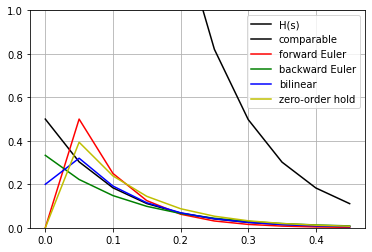

In [5]:
# find the continuous time response and the comparable response
t, y_s = H_s.impulse(T=t)
t, y_comp_s = sig.lti([0.5], [1, 10]).impulse(T=t)

# find the discrete time impulse respose of each system
t, y_fe = H_z_fe.impulse(t=t)
t, y_be = H_z_be.impulse(t=t)
t, y_b = H_z_b.impulse(t=t)
t, y_zoh = H_z_zoh.impulse(t=t)

# plot the impulse responses
plt.plot(t, y_s, color='k')
plt.plot(t, y_comp_s, color='k')
plt.plot(t, np.squeeze(y_fe), color='r')
plt.plot(t, np.squeeze(y_be), color='g')
plt.plot(t, np.squeeze(y_b), color='b')
plt.plot(t, np.squeeze(y_zoh), color='y')
plt.ylim([0, 1])

plt.legend(['H(s)', 'comparable', 'forward Euler', 'backward Euler', 'bilinear', 'zero-order hold'])
plt.grid()
# the continuous time reponse starts at a value of 10!
# you can't see the start because of how the y-axis is scaled

### 4.5.6.3 Discrete time Bode plot

Before we look at the Bode plots,  
let's remind ourselves how the Bode plot relates to the s and z-planes  
  
The Bode plot shows us the gain (magnitude and phase) of the transfer function for steady state sine waves  
On the s-plane, continuous time sine waves are described by complex conjugate imaginary values of s  
For the continuous time Bode plot, we only have to concern ourselves with the positive imaginary axis  
and the Bode plot is a graph of H(s) on the y-axis, versus the positive imaginary axis of the s-plane along the x-axis  
  
The figure below shows the values of s used for the x-axis of the continuous time Bode plot  
and the values of z used for the x-axis of the discrete time Bode plot  
![image6!](./images_s4/image_4_5_6.png)  

Discrete time Bode plots are measured up to half the sampling rate  
Our example system used a sampling rate of 20 samples/sec,  
therefore the Bode plots are measured up to the frequency of 10Hz, or 62.8 [rad/s]  
  
The code cell below creates the Bode plots for the various systems  
[Discrete Bode plot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.bode.html#scipy.signal.dlti.bode)

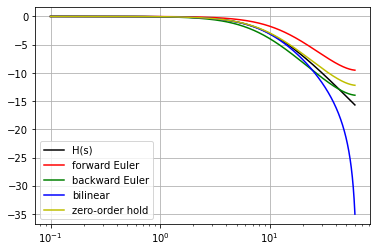

In [6]:
# create a frequency array for the continuous time system
w_s = np.linspace(0.1, 60, 1000)
# create a frequency array for the discrete time systems
w_z = np.linspace(0.005, 3, 1000)

w_s, mag_s, phase = H_s.bode(w=w_s)
w, mag_fe, phase = H_z_fe.bode(w=w_z)
w, mag_be, phase = H_z_be.bode(w=w_z)
w, mag_b, phase = H_z_b.bode(w=w_z)
w, mag_zoh, phase = H_z_zoh.bode(w=w_z)

plt.plot(w_s, mag_s, color='k')
plt.plot(w, mag_fe, color='r')
plt.plot(w, mag_be, color='g')
plt.plot(w, mag_b, color='b')
plt.plot(w, mag_zoh, color='y')

plt.xscale('log')
plt.legend(['H(s)', 'forward Euler', 'backward Euler', 'bilinear', 'zero-order hold'])
plt.grid()